# SymPy Tutorial

*Arthur Ryman* <br/>
*Last Updated: 2020-04-16*


This notebook contains the examples from the 
[SymPy Tutorial](https://docs.sympy.org/latest/tutorial/index.html).

## Matrices

In [1]:
from sympy import *
init_printing(use_unicode=True)

### simplify

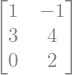

In [2]:
Matrix([[1, -1], [3, 4], [0, 2]])

In [3]:
Matrix([1, 2, 3])

In [4]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

### Basic Operations

#### Shape

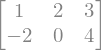

In [5]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

In [6]:
M.shape

#### Accessing Rows and Columns

In [7]:
M.row(0)

In [8]:
M.col(-1)

#### Deleting and Inserting Rows and Columns

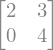

In [9]:
M.col_del(0)
M

In [10]:
M.row_del(1)
M

In [11]:
M

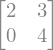

In [12]:
M = M.row_insert(1, Matrix([[0, 4]]))
M

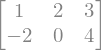

In [13]:
M = M.col_insert(0, Matrix([1, -2]))
M

### Basic Methods

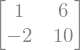

In [14]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
M + N

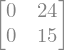

In [15]:
M*N

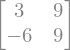

In [16]:
3*M

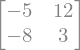

In [17]:
M**2

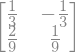

In [18]:
M**-1

In [19]:
try:
    N**-1
except Exception as ex:
    print(type(ex))
    print(ex)

<class 'sympy.matrices.common.NonInvertibleMatrixError'>
Matrix det == 0; not invertible.


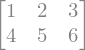

In [20]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

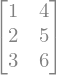

In [21]:
M.T

### Matrix Constructors

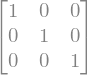

In [22]:
eye(3)

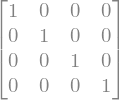

In [23]:
eye(4)

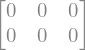

In [24]:
zeros(2, 3)

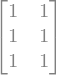

In [25]:
ones(3, 2)

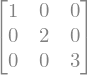

In [26]:
diag(1, 2, 3)

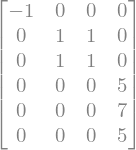

In [27]:
diag(-1, ones(2, 2), Matrix([5, 7, 5]))

### Advanced Methods

#### Determinant

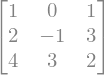

In [28]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

In [29]:
M.det()

#### RREF

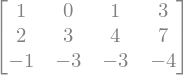

In [30]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

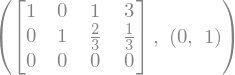

In [31]:
M.rref()

#### Nullspace

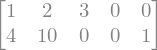

In [32]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M

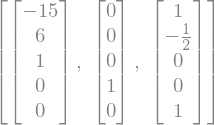

In [33]:
M.nullspace()

#### Columnspace

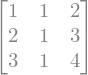

In [34]:
M = Matrix([[1, 1, 2], [2, 1, 3], [3, 1, 4]])
M

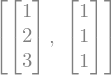

In [35]:
M.columnspace()

#### Eigenvalues, Eigenvectors, and Diagonalization

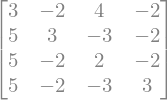

In [36]:
M = Matrix([\
           [3, -2, 4, -2],\
           [5, 3, -3, -2],\
           [5, -2, 2, -2],\
           [5, -2, -3, 3]])
M

In [37]:
M.eigenvals()

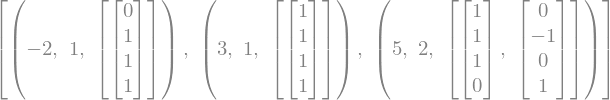

In [38]:
M.eigenvects()

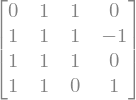

In [39]:
P, D = M.diagonalize()
P

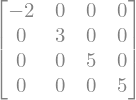

In [40]:
D

In [41]:
P*D*P**-1 == M

True

In [42]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
factor(p)

### Possible Issues

#### Zero Testing

In [43]:
from sympy import *
q = Symbol('q', positive=True)
m = Matrix([
    [-2*cosh(q/3),      exp(-q),            1],
    [      exp(q), -2*cosh(q/3),            1],
    [           1,            1, -2*cosh(q/3)]])
m.nullspace()

In [44]:
import warnings

def my_iszero(x):
    try:
        result = x.is_zero
    except AttributeError:
        result = None
        
    # Warnings if evaluated into None
    if result is None:
        warnings.warn('Zero testing of {} evaluated into None'.format(x))
    return result

m.nullspace(iszerofunc=my_iszero)

/Users/arthurryman/Documents/repositories/agryman/acmpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Zero testing of 4*cosh(q/3)**2 - 1 evaluated into None
  # This is added back by InteractiveShellApp.init_path()
/Users/arthurryman/Documents/repositories/agryman/acmpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Zero testing of (-exp(q) - 2*cosh(q/3))*(-2*cosh(q/3) - exp(-q)) - (4*cosh(q/3)**2 - 1)**2 evaluated into None
  # This is added back by InteractiveShellApp.init_path()
/Users/arthurryman/Documents/repositories/agryman/acmpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Zero testing of 2*exp(q)*cosh(q/3) - 16*cosh(q/3)**4 + 12*cosh(q/3)**2 + 2*exp(-q)*cosh(q/3) evaluated into None
  # This is added back by InteractiveShellApp.init_path()
/Users/arthurryman/Documents/repositories/agryman/acmpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Zero testing of -(4*cosh(q/3)**2 - 

/Users/arthurryman/Documents/repositories/agryman/acmpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Zero testing of -2*cosh(q/3) - exp(-q) evaluated into None
  if __name__ == '__main__':


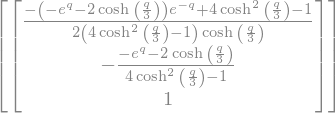

In [45]:
def my_iszero(x):
    try:
        result = x.rewrite(exp).simplify().is_zero
    except AttributeError:
        result = None
        
    # Warnings of evaluated into None
    if result is None:
        warnings.warn('Zero testing of {} evaluated into None'.format(x))
    return result

m.nullspace(iszerofunc=my_iszero)